In [1]:
import requests
import chess.pgn
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
import json
import re

#import pprint
#from pprint import pprint

In [2]:
games = []
api_url =  [
    "https://api.chess.com/pub/player/1987carthage/games/2023/09",
    "https://api.chess.com/pub/player/1987carthage/games/2023/10",
    "https://api.chess.com/pub/player/1987carthage/games/2023/11",
    "https://api.chess.com/pub/player/1987carthage/games/2023/12",
    "https://api.chess.com/pub/player/1987carthage/games/2024/01",
    "https://api.chess.com/pub/player/1987carthage/games/2024/02",
    "https://api.chess.com/pub/player/1987carthage/games/2024/03",
    "https://api.chess.com/pub/player/1987carthage/games/2024/04",
    "https://api.chess.com/pub/player/1987carthage/games/2024/05",
    "https://api.chess.com/pub/player/1987carthage/games/2024/06",
    "https://api.chess.com/pub/player/1987carthage/games/2024/07"
  ]
headers = {
    "User-Agent": "My Python Application. Contact me at thsouzaa1@gmail.com"
}
def count_moves_in_pgn(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)
    board = game.board()
    move_count = 0

    for move in game.mainline_moves():
        board.push(move)
        move_count += 1

    return move_count/2

def scraping(url): 
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        try:
            data = response.json()
            
            for game in data['games']:
                termination = None
                eco_url = None
                utc_date = None
                move_count = 0

                if 'pgn' in game:
                    pgn_text = game['pgn']
                    termination_match = re.search(r'\[Termination "(.*?)"\]', pgn_text)
                    eco_match = re.search(r'\[ECOUrl "(.*?)"\]', pgn_text)
                    utc_date_match = re.search(r'\[UTCDate "(.*?)"\]', pgn_text)

                    if termination_match:
                        termination = termination_match.group(1)
                    if eco_match:
                        eco_url  = eco_match.group(1)
                    if utc_date_match:
                        utc_date = utc_date_match.group(1)
                   

                    
                    # Contar lances no PGN
                    move_count = count_moves_in_pgn(pgn_text)

                games.append({
                    "White": game["white"]["username"],
                    "White Rating": game["white"]["rating"],
                    "Black": game["black"]["username"],
                    "Black Rating": game["black"]["rating"],
                    "Date": game["end_time"],
                    "URL": game["url"],
                    "Link": eco_url,
                    "Termination": termination,
                    "TimeControl": game["time_control"],
                    "UTCDate": utc_date,
                    "Moves": move_count # Adiciona a contagem de movimentos
                })

        except json.JSONDecodeError:
            print("A resposta não é um JSON válido")
    else: 
        print(f"Erro na solicitação, Status code: {response.status_code}")


for link in api_url:
    scraping(link)

In [3]:
df = pd.DataFrame(games)

In [4]:
df.head(10)

,White,White Rating,Black,Black Rating,Date,URL,Link,Termination,TimeControl,UTCDate,Moves
0,1987carthage,244,Jake9198,507,1694115158,https://www.chess.com/game/live/81563144366,https://www.chess.com/openings/Nimzowitsch-Def...,Jake9198 won on time,600,2023.09.07,17.0
1,1987carthage,359,marcos1234567896h5hh5,147,1694116021,https://www.chess.com/game/live/81563291504,https://www.chess.com/openings/Nimzowitsch-Def...,1987carthage won - game abandoned,600,2023.09.07,1.5
2,1987carthage,445,inessstt,294,1694116829,https://www.chess.com/game/live/81563315392,https://www.chess.com/openings/Nimzowitsch-Def...,1987carthage won - game abandoned,600,2023.09.07,19.5
3,mertcglar,499,1987carthage,372,1694120584,https://www.chess.com/game/live/81563632170,https://www.chess.com/openings/Kings-Pawn-Open...,mertcglar won on time,600,2023.09.07,22.5
4,1987carthage,299,Aleksandroooooooo,353,1694121802,https://www.chess.com/game/live/81563712018,https://www.chess.com/openings/Scandinavian-De...,Aleksandroooooooo won on time,600,2023.09.07,27.0
5,puss1destroyer23,278,1987carthage,354,1694124169,https://www.chess.com/game/live/81563923734,https://www.chess.com/openings/Kings-Gambit-2....,1987carthage won - game abandoned,600,2023.09.07,7.0
6,1987carthage,346,Giacomopapini,293,1694130605,https://www.chess.com/game/live/81564286526,https://www.chess.com/openings/Sicilian-Defens...,Game drawn by repetition,600,2023.09.07,36.0
7,1987carthage,392,CesarGrucci,356,1694131091,https://www.chess.com/game/live/81564333020,https://www.chess.com/openings/Center-Game,1987carthage won by resignation,600,2023.09.07,21.5
8,Voisar,377,1987carthage,348,1694132825,https://www.chess.com/game/live/81564415482,https://www.chess.com/openings/Van-Geet-Openin...,Voisar won by checkmate,600,2023.09.08,12.5
9,B_Capucho,290,1987carthage,305,1694133785,https://www.chess.com/game/live/81564444880,https://www.chess.com/openings/Reti-Opening-Re...,B_Capucho won on time,600,2023.09.08,23.5


In [5]:
df.info()
# percebe-se valores em branco na Coluna 'Link'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   White         1371 non-null   object 
 1   White Rating  1371 non-null   int64  
 2   Black         1371 non-null   object 
 3   Black Rating  1371 non-null   int64  
 4   Date          1371 non-null   int64  
 5   URL           1371 non-null   object 
 6   Link          1369 non-null   object 
 7   Termination   1371 non-null   object 
 8   TimeControl   1371 non-null   object 
 9   UTCDate       1371 non-null   object 
 10  Moves         1371 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 117.9+ KB


In [6]:
df.loc[df.Link.isnull()]

,White,White Rating,Black,Black Rating,Date,URL,Link,Termination,TimeControl,UTCDate,Moves
673,1987carthage,613,F4Stryker,516,1700524626,https://www.chess.com/game/live/94263695891,None,F4Stryker won - game abandoned,600,2023.11.20,0.0
706,Romak1717,288,1987carthage,636,1700935134,https://www.chess.com/game/live/94674008727,None,1987carthage won - game abandoned,600,2023.11.25,0.0


In [7]:
df = df.drop([673, 706], axis=0)
# Foi concluido que estas linhas poderiam ser descartas, não seram de nenhuma utilidade.

In [8]:
def categorizador_result(value):
    if '1987carthage' in value:
        return 'Vitória'
    elif 'draw' in value:
        return 'Empate'
    else:
        return 'Derrota'

df['Termination'] = df['Termination'].apply(categorizador_result)
df.head()


,White,White Rating,Black,Black Rating,Date,URL,Link,Termination,TimeControl,UTCDate,Moves
0,1987carthage,244,Jake9198,507,1694115158,https://www.chess.com/game/live/81563144366,https://www.chess.com/openings/Nimzowitsch-Def...,Derrota,600,2023.09.07,17.0
1,1987carthage,359,marcos1234567896h5hh5,147,1694116021,https://www.chess.com/game/live/81563291504,https://www.chess.com/openings/Nimzowitsch-Def...,Vitória,600,2023.09.07,1.5
2,1987carthage,445,inessstt,294,1694116829,https://www.chess.com/game/live/81563315392,https://www.chess.com/openings/Nimzowitsch-Def...,Vitória,600,2023.09.07,19.5
3,mertcglar,499,1987carthage,372,1694120584,https://www.chess.com/game/live/81563632170,https://www.chess.com/openings/Kings-Pawn-Open...,Derrota,600,2023.09.07,22.5
4,1987carthage,299,Aleksandroooooooo,353,1694121802,https://www.chess.com/game/live/81563712018,https://www.chess.com/openings/Scandinavian-De...,Derrota,600,2023.09.07,27.0


In [9]:
# Meu foco é analisar as partidas de 10minutos, então outros tipos de partidas vou deixar como valor nulo para filtrar depois
df['Modalidade'] = df.apply(lambda row: 'Rapid 10min' if '600' in row['TimeControl'] else None, axis=1)

In [10]:
df['Cor_Pecas'] = df.apply(lambda row: 'Brancas' if '1987carthage' in row['White'] else 'Pretas' if '1987carthage' in row['Black'] else None, axis= 1)
df.head(2)

,White,White Rating,Black,Black Rating,Date,URL,Link,Termination,TimeControl,UTCDate,Moves,Modalidade,Cor_Pecas
0,1987carthage,244,Jake9198,507,1694115158,https://www.chess.com/game/live/81563144366,https://www.chess.com/openings/Nimzowitsch-Def...,Derrota,600,2023.09.07,17.0,Rapid 10min,Brancas
1,1987carthage,359,marcos1234567896h5hh5,147,1694116021,https://www.chess.com/game/live/81563291504,https://www.chess.com/openings/Nimzowitsch-Def...,Vitória,600,2023.09.07,1.5,Rapid 10min,Brancas


In [11]:
df['Current Rating'] = df.apply(lambda row: row['White Rating'] if row['White'] == '1987carthage' else row['Black Rating'], axis=1)
df['Enemy Rating'] = df.apply(lambda row: row['White Rating'] if row['White'] != '1987carthage' else row['Black Rating'], axis=1)
df.head()

,White,White Rating,Black,Black Rating,Date,URL,Link,Termination,TimeControl,UTCDate,Moves,Modalidade,Cor_Pecas,Current Rating,Enemy Rating
0,1987carthage,244,Jake9198,507,1694115158,https://www.chess.com/game/live/81563144366,https://www.chess.com/openings/Nimzowitsch-Def...,Derrota,600,2023.09.07,17.0,Rapid 10min,Brancas,244,507
1,1987carthage,359,marcos1234567896h5hh5,147,1694116021,https://www.chess.com/game/live/81563291504,https://www.chess.com/openings/Nimzowitsch-Def...,Vitória,600,2023.09.07,1.5,Rapid 10min,Brancas,359,147
2,1987carthage,445,inessstt,294,1694116829,https://www.chess.com/game/live/81563315392,https://www.chess.com/openings/Nimzowitsch-Def...,Vitória,600,2023.09.07,19.5,Rapid 10min,Brancas,445,294
3,mertcglar,499,1987carthage,372,1694120584,https://www.chess.com/game/live/81563632170,https://www.chess.com/openings/Kings-Pawn-Open...,Derrota,600,2023.09.07,22.5,Rapid 10min,Pretas,372,499
4,1987carthage,299,Aleksandroooooooo,353,1694121802,https://www.chess.com/game/live/81563712018,https://www.chess.com/openings/Scandinavian-De...,Derrota,600,2023.09.07,27.0,Rapid 10min,Brancas,299,353


In [12]:
# Extraindo abertura da partida do 'Link'
df['Opening'] = df['Link'].apply(lambda x: re.search(r'/openings/([^/]+)', x).group(1))
df['Opening'] = df['Opening'].str.replace(r'-\d.*$', '', regex=True)
df.head(2)


,White,White Rating,Black,Black Rating,Date,URL,Link,Termination,TimeControl,UTCDate,Moves,Modalidade,Cor_Pecas,Current Rating,Enemy Rating,Opening
0,1987carthage,244,Jake9198,507,1694115158,https://www.chess.com/game/live/81563144366,https://www.chess.com/openings/Nimzowitsch-Def...,Derrota,600,2023.09.07,17.0,Rapid 10min,Brancas,244,507,Nimzowitsch-Defense
1,1987carthage,359,marcos1234567896h5hh5,147,1694116021,https://www.chess.com/game/live/81563291504,https://www.chess.com/openings/Nimzowitsch-Def...,Vitória,600,2023.09.07,1.5,Rapid 10min,Brancas,359,147,Nimzowitsch-Defense-Declined


In [13]:
# Limpando o data frame 
games_df = df.drop(['White', 'White Rating', 'Black', 'Black Rating', 'Link', 'Date', 'TimeControl'], axis=1)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1369 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL             1369 non-null   object 
 1   Termination     1369 non-null   object 
 2   UTCDate         1369 non-null   object 
 3   Moves           1369 non-null   float64
 4   Modalidade      1356 non-null   object 
 5   Cor_Pecas       1369 non-null   object 
 6   Current Rating  1369 non-null   int64  
 7   Enemy Rating    1369 non-null   int64  
 8   Opening         1369 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 107.0+ KB


In [14]:
games_df = games_df[games_df['Modalidade'] == 'Rapid 10min']

In [15]:
games_df.head()

,URL,Termination,UTCDate,Moves,Modalidade,Cor_Pecas,Current Rating,Enemy Rating,Opening
0,https://www.chess.com/game/live/81563144366,Derrota,2023.09.07,17.0,Rapid 10min,Brancas,244,507,Nimzowitsch-Defense
1,https://www.chess.com/game/live/81563291504,Vitória,2023.09.07,1.5,Rapid 10min,Brancas,359,147,Nimzowitsch-Defense-Declined
2,https://www.chess.com/game/live/81563315392,Vitória,2023.09.07,19.5,Rapid 10min,Brancas,445,294,Nimzowitsch-Defense-Declined
3,https://www.chess.com/game/live/81563632170,Derrota,2023.09.07,22.5,Rapid 10min,Pretas,372,499,Kings-Pawn-Opening
4,https://www.chess.com/game/live/81563712018,Derrota,2023.09.07,27.0,Rapid 10min,Brancas,299,353,Scandinavian-Defense-Closed


In [16]:
import seaborn as sns

In [17]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL             1356 non-null   object 
 1   Termination     1356 non-null   object 
 2   UTCDate         1356 non-null   object 
 3   Moves           1356 non-null   float64
 4   Modalidade      1356 non-null   object 
 5   Cor_Pecas       1356 non-null   object 
 6   Current Rating  1356 non-null   int64  
 7   Enemy Rating    1356 non-null   int64  
 8   Opening         1356 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.9+ KB


In [18]:
games_df['Year'] = pd.to_datetime(games_df['UTCDate']).dt.to_period('Y')
games_df['Month'] = pd.to_datetime(games_df['UTCDate']).dt.to_period('M')
games_df['Weeks'] = pd.to_datetime(games_df['UTCDate']).dt.to_period('W')
games_df.head()

,URL,Termination,UTCDate,Moves,Modalidade,Cor_Pecas,Current Rating,Enemy Rating,Opening,Year,Month,Weeks
0,https://www.chess.com/game/live/81563144366,Derrota,2023.09.07,17.0,Rapid 10min,Brancas,244,507,Nimzowitsch-Defense,2023,2023-09,2023-09-04/2023-09-10
1,https://www.chess.com/game/live/81563291504,Vitória,2023.09.07,1.5,Rapid 10min,Brancas,359,147,Nimzowitsch-Defense-Declined,2023,2023-09,2023-09-04/2023-09-10
2,https://www.chess.com/game/live/81563315392,Vitória,2023.09.07,19.5,Rapid 10min,Brancas,445,294,Nimzowitsch-Defense-Declined,2023,2023-09,2023-09-04/2023-09-10
3,https://www.chess.com/game/live/81563632170,Derrota,2023.09.07,22.5,Rapid 10min,Pretas,372,499,Kings-Pawn-Opening,2023,2023-09,2023-09-04/2023-09-10
4,https://www.chess.com/game/live/81563712018,Derrota,2023.09.07,27.0,Rapid 10min,Brancas,299,353,Scandinavian-Defense-Closed,2023,2023-09,2023-09-04/2023-09-10


c:\Users\thsou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thsou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


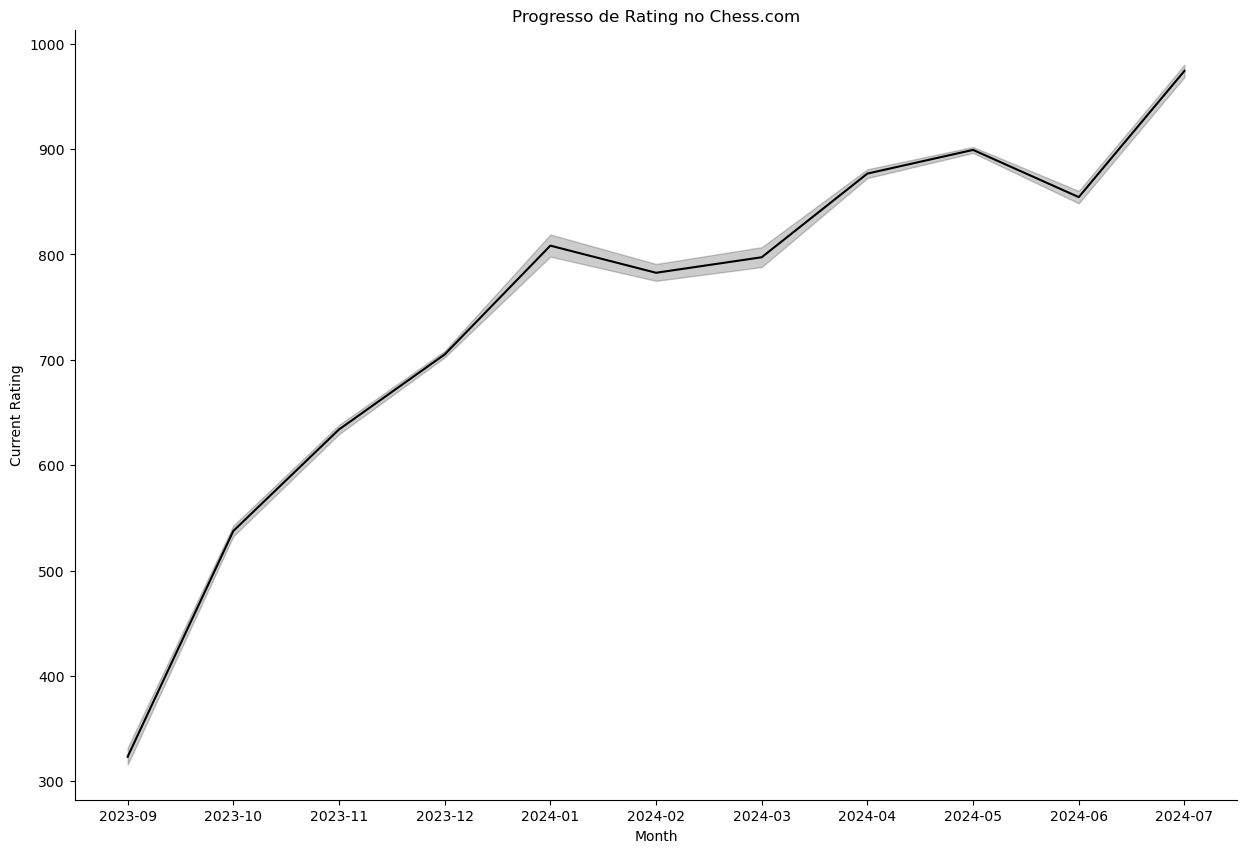

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Progresso de Rating no Chess.com")
sns.lineplot(x=games_df['Month'].astype(str), y=games_df['Current Rating'], color="black")
sns.despine()
plt.xticks(rotation=0)
plt.show()

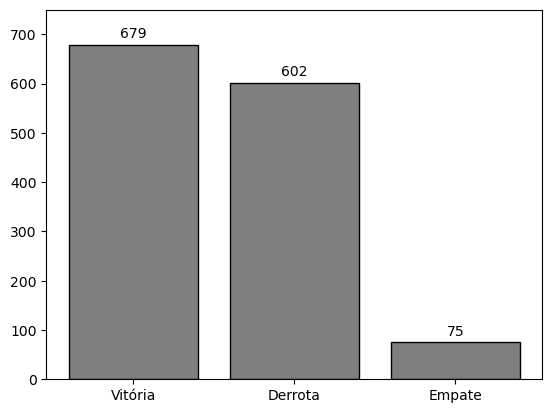

In [20]:
termination_count = games_df['Termination'].value_counts()
ind = termination_count.index
val = termination_count.values
fig, ax= plt.subplots()
ax.bar(ind, val, edgecolor="black", color=("black", 0.5))

ax.set(ylim=(0, 750))
for i in range(0,3):
    ax.annotate( val[i],
        (i, val[i]),
        ha="center",
        xytext=(0,5),
        textcoords="offset points"
    )

plt.show()

In [21]:
# Transformando o resultado em binario, Vitoria = 1 Derrota = 0
games_df['Vitoria'] = games_df['Termination'].apply(lambda x: 1 if x == 'Vitória' else 0)

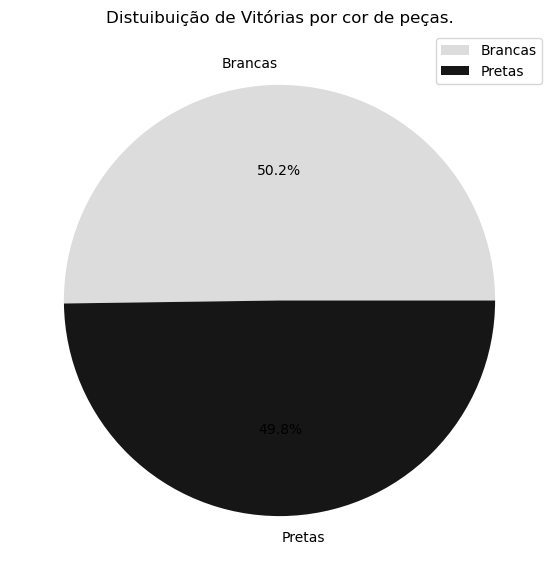

In [22]:
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(games_df.groupby('Cor_Pecas')['Vitoria'].sum(), labels=df['Cor_Pecas'].unique(), autopct='%1.1f%%', colors = ('#dcdcdc','#161616'))
plt.title("Distuibuição de Vitórias por cor de peças.")
plt.legend()
plt.show()

In [23]:
openings_stats = games_df.groupby('Opening').agg({'Vitoria':['count', 'sum']})
openings_stats.columns = ['Total_Partidas', 'Vitorias']
openings_stats['Taxa_Vitoria'] = openings_stats['Vitorias'] / openings_stats['Total_Partidas'] * 100
openings_stats = openings_stats.sort_values(by=['Total_Partidas', 'Taxa_Vitoria'], ascending=False )
print(openings_stats)

                                              Total_Partidas  Vitorias  \
Opening                                                                  
Sicilian-Defense                                          62        32   
Queens-Gambit-Accepted-Old-Variation                      61        28   
Sicilian-Defense-Bowdler-Attack                           59        27   
Queens-Pawn-Opening-Zukertort-Variation                   56        30   
English-Opening-Kings-English-Variation                   55        29   
...                                                      ...       ...   
Sicilian-Defense-Open                                      1         0   
Sicilian-Defense-Smith-Morra-Gambit-Accepted               1         0   
Sicilian-Defense-Snyder-Variation                          1         0   
Slav-Defense-Modern-Triangle-System                        1         0   
Torre-Attack-Fianchetto-Defense...5.c3-d6                  1         0   

                                     

In [24]:
top_10_openings = openings_stats.head(10)
top_10_openings.head(10)

,Total_Partidas,Vitorias,Taxa_Vitoria
Opening,,,
Sicilian-Defense,62,32,51.612903
Queens-Gambit-Accepted-Old-Variation,61,28,45.901639
Sicilian-Defense-Bowdler-Attack,59,27,45.762712
Queens-Pawn-Opening-Zukertort-Variation,56,30,53.571429
English-Opening-Kings-English-Variation,55,29,52.727273
Queens-Pawn-Opening,50,23,46.000000
French-Defense-Franco-Sicilian-Defense,39,13,33.333333
Vant-Kruijs-Opening,38,17,44.736842
Queens-Pawn-Opening-Horwitz-Defense,35,15,42.857143


<Figure size 1200x600 with 0 Axes>

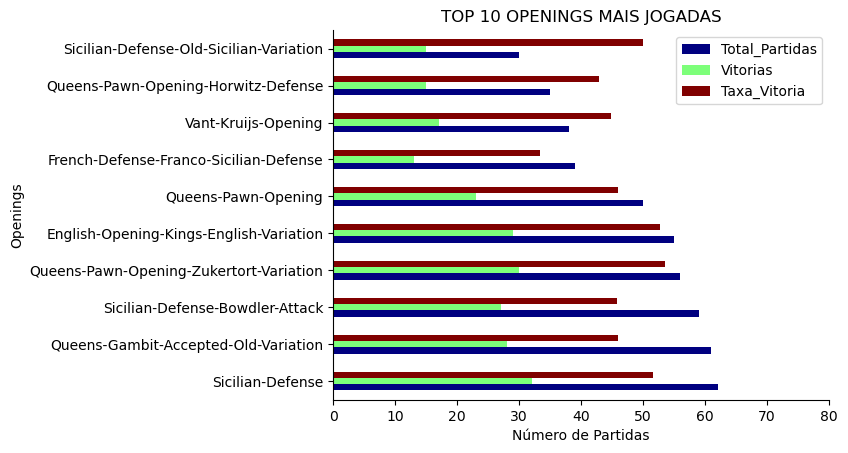

In [25]:
plt.figure(figsize=(12, 6))
top_10_openings.plot(kind='barh', colormap="jet")
plt.title('TOP 10 OPENINGS MAIS JOGADAS')
plt.xlabel('Número de Partidas')
plt.ylabel('Openings')
axes = plt.gca()
axes.set_xlim([0, 80])
axes.spines.top.set_visible(False)
axes.spines.right.set_visible(False) 
plt.show()

C:\Users\thsou\AppData\Local\Temp\ipykernel_20596\706012519.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate( '{: ,.0f}%' .format(y[i]),
C:\Users\thsou\AppData\Local\Temp\ipykernel_20596\706012519.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (i, y[i]),


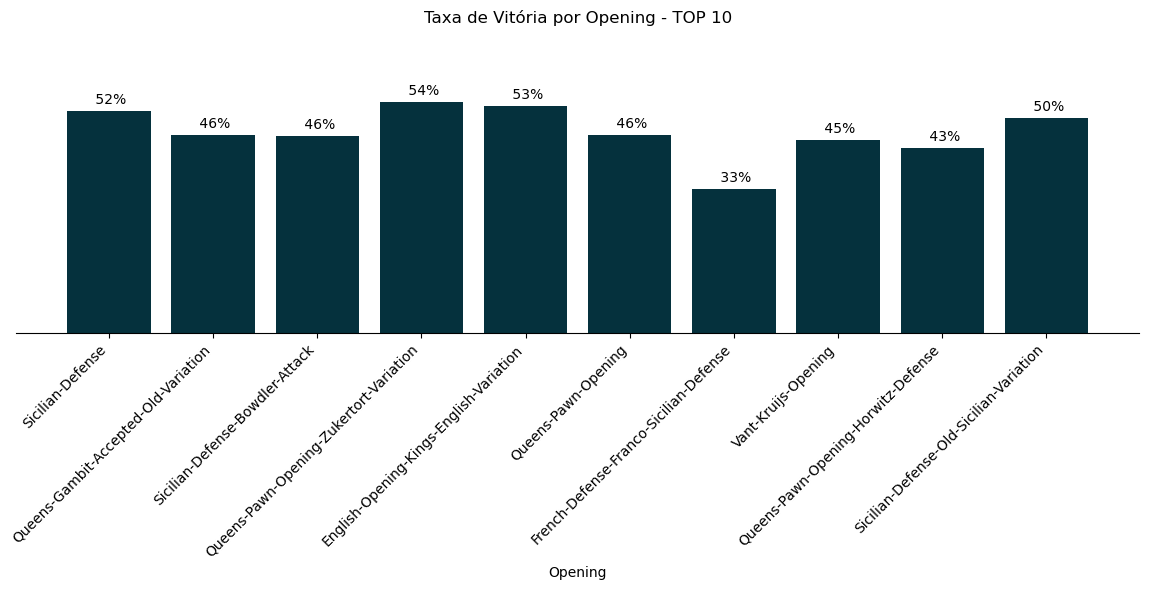

In [26]:
plt.figure(figsize=(12,6))

x = top_10_openings.index
y = top_10_openings['Taxa_Vitoria']
plt.bar(top_10_openings.index, top_10_openings['Taxa_Vitoria'], color="#05313d")
plt.title('Taxa de Vitória por Abertura (Top 10)')
plt.xlabel('Opening')
plt.ylabel('Taxa de Vitória (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i in range(0,10):
    plt.annotate( '{: ,.0f}%' .format(y[i]),
        (i, y[i]),
        ha="center",
        xytext=(0,5),
        textcoords="offset points"
    )
axes = plt.gca()
axes.set_ylim([0, 70])
axes.yaxis.set_visible(False)
axes.spines.top.set_visible(False)
axes.spines.right.set_visible(False) 
axes.spines.left.set_visible(False) 
plt.title("Taxa de Vitória por Opening - TOP 10")
plt.show()

c:\Users\thsou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


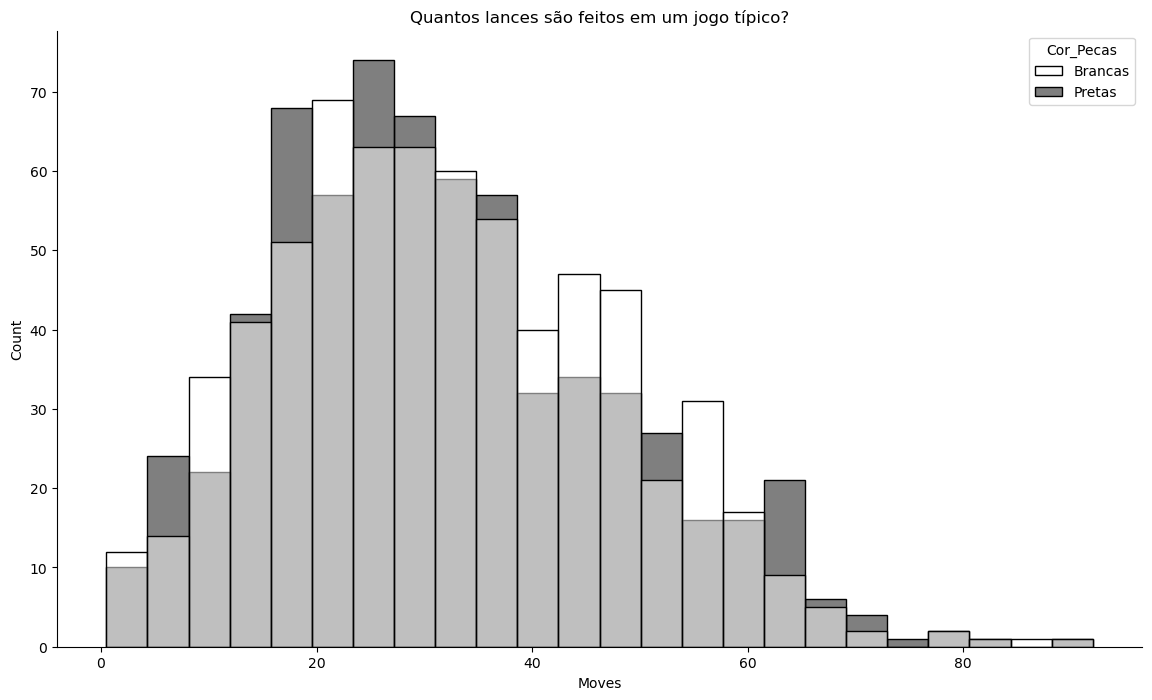

In [27]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Quantos lances são feitos em um jogo típico?")

sns.histplot(games_df, x="Moves", hue="Cor_Pecas", palette={"Pretas": "Black", "Brancas": "White"})
sns.despine()
plt.show()

c:\Users\thsou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


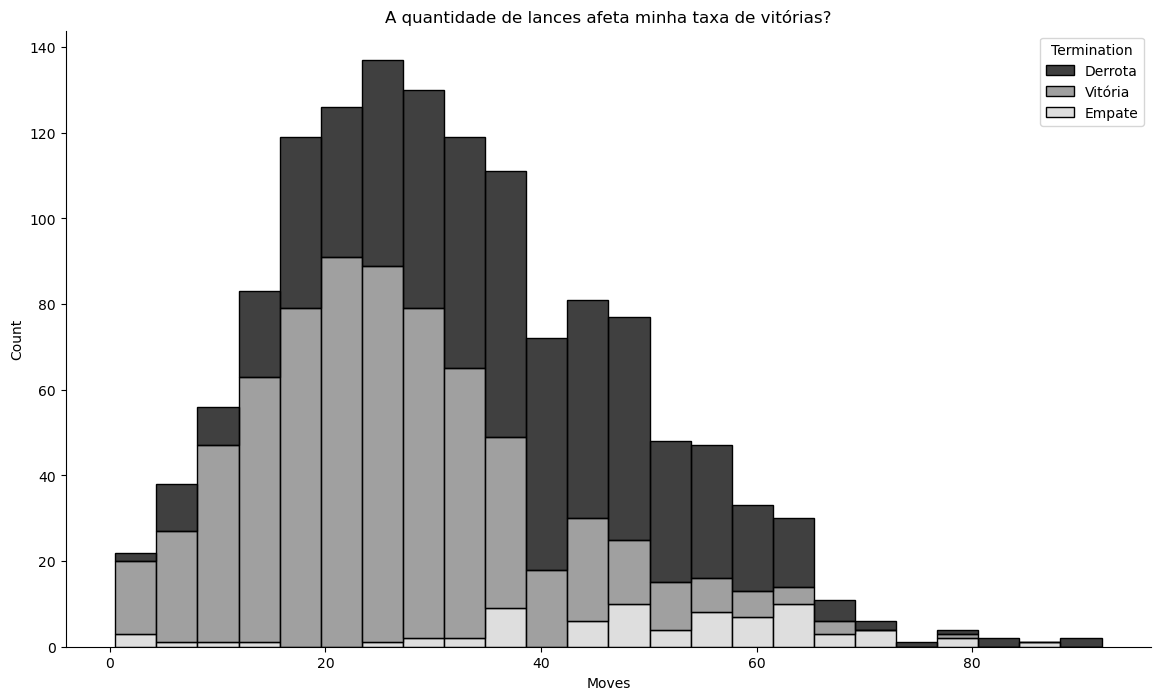

In [28]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("A quantidade de lances afeta minha taxa de vitórias?")
sns.despine()
sns.histplot(games_df, x="Moves", hue="Termination", multiple="stack", palette={"Derrota": "Black", "Vitória": "Gray", "Empate": "lightgray"})
plt.show()


In [29]:
games_df['Rating Difference'] = games_df['Enemy Rating'] - games_df['Current Rating']

c:\Users\thsou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


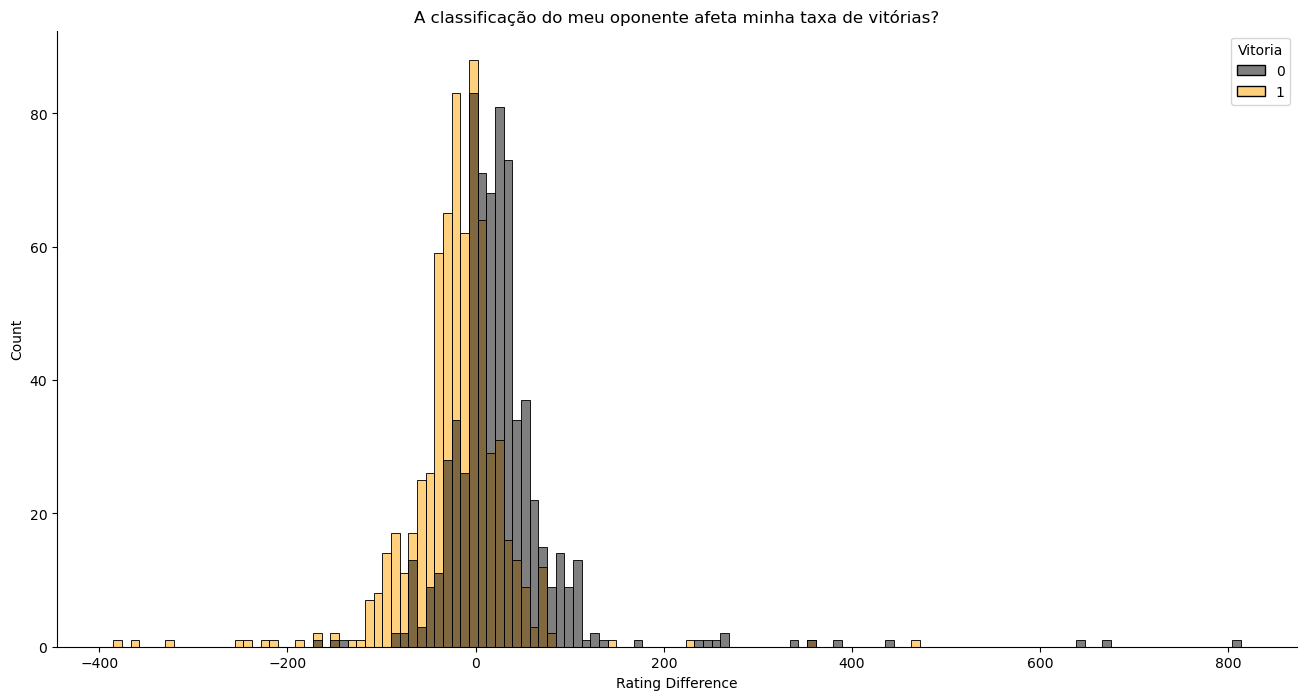

In [30]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("A classificação do meu oponente afeta minha taxa de vitórias?")
sns.despine()
sns.histplot(games_df, x="Rating Difference", hue="Vitoria", palette={0: "Black", 1: "Orange"})
plt.close(2)

c:\Users\thsou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


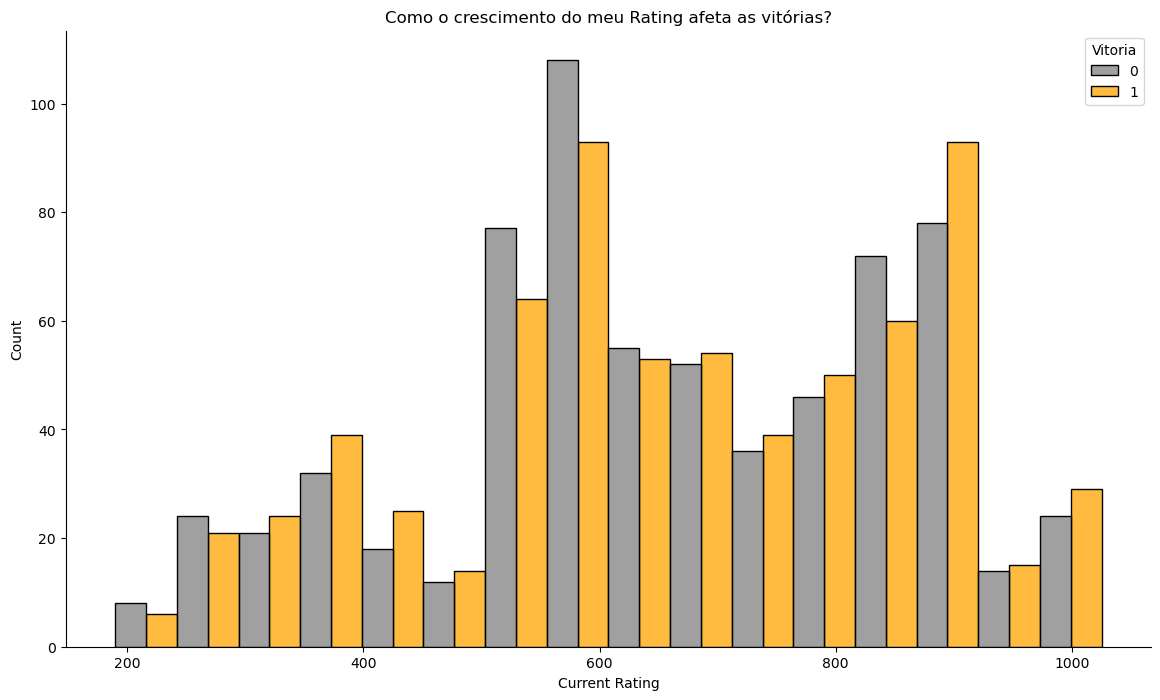

In [31]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Como o crescimento do meu Rating afeta as vitórias?")
sns.despine()
sns.histplot(games_df, x="Current Rating", hue="Vitoria", multiple="dodge", palette={0: "Gray", 1: "Orange"})
plt.close(2)